In [1]:
%matplotlib inline
import sys
import numpy as np
import numpy.random as rnd
import time
import GPflow
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt

In [2]:
M = 50

# Create a dataset and initialise model

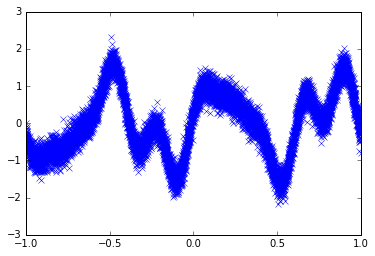

In [3]:
def func(x):
    return np.sin(x * 3*3.14) + 0.3*np.cos(x * 9*3.14) + 0.5 * np.sin(x * 7*3.14)
X = rnd.rand(10000, 1) * 2 - 1
Y = func(X) + rnd.randn(10000, 1) * 0.2
plt.plot(X, Y, 'x')
D = X.shape[1]
Xt = np.linspace(-1.1, 1.1, 100)[:, None]
Yt = func(Xt)

In [4]:
def init():
    kern = GPflow.kernels.RBF(D, 1)
    Z = X[:M, :]
    m = GPflow.svgp.SVGP(X, Y, kern, GPflow.likelihoods.Gaussian(), Z)
    return m
m = init()

In [5]:
m._compile()
ground_truth = m._objective(m.get_free_state())[0]
print m.minibatch_size
print ground_truth

compiling tensorflow function...
done
10000
17773.2303599


# Stochastically calculate bound and show noise
The minibatch estimate should be an unbiased estimator of the `ground_truth`. Here we show a histogram of the value from different evaluations, together with its mean and the ground truth. The small difference between the mean of the minibatch estimations and the ground truth shows that the minibatch estimator is working as expected.

In [6]:
m.minibatch_size = 100
evals = [m._objective(m.get_free_state())[0] for _ in xrange(100)]

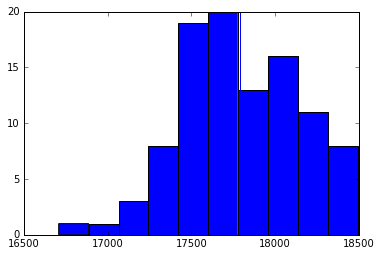

In [7]:
plt.hist(evals)
plt.axvline(np.mean(evals), color='b')
plt.axvline(ground_truth, color='r')

# Show that minibatches speed up computation
The use of using minibatches is that it decreases the time needed to make an optimisation step, since estmating the objective is cheaper. Here we plot the change in time required with the size of the minibatch. We see that smaller minibatches result in a cheaper estimate of the objective.

In [8]:
mbps = np.logspace(-2, 0, 10)
times = []
for mbp in mbps:
    m.minibatch_size = int(len(X) * mbp)
    m._compile()
    start_time = time.time()
    objs = [m._objective(m.get_free_state())[0] for _ in xrange(20)]
#    plt.hist(objs, bins = 100)
#    plt.axvline(ground_truth, color='r')
    times.append(time.time() - start_time)

compiling tensorflow function...
done
compiling tensorflow function...
done
compiling tensorflow function...
done
compiling tensorflow function...
done
compiling tensorflow function...
done
compiling tensorflow function...
done
compiling tensorflow function...
done
compiling tensorflow function...
done
compiling tensorflow function...
done
compiling tensorflow function...
done


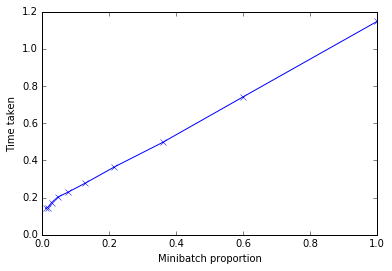

In [9]:
plt.plot(mbps, times, 'x-')
plt.xlabel("Minibatch proportion")
plt.ylabel("Time taken")